# Exploratory Data Analysis

In [1]:
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 15})

# Load data

In [2]:
df = pd.read_csv('../data/kdd99-unsupervised-ad.csv')
print("Data size:", df.shape) # print data size
df.columns = ['v_{}'.format(i) for i in range(30)] # column names
df.head()

Data size: (620097, 30)


,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_20,v_21,v_22,v_23,v_24,v_25,v_26,v_27,v_28,v_29
0,0.0,162.0,4528.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,n
1,0.0,236.0,1228.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,n
2,0.0,233.0,2032.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,n
3,0.0,239.0,486.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,n
4,0.0,238.0,1282.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,n


# Data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620097 entries, 0 to 620096
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   v_0     620097 non-null  float64
 1   v_1     620097 non-null  float64
 2   v_2     620097 non-null  float64
 3   v_3     620097 non-null  float64
 4   v_4     620097 non-null  float64
 5   v_5     620097 non-null  float64
 6   v_6     620097 non-null  float64
 7   v_7     620097 non-null  float64
 8   v_8     620097 non-null  float64
 9   v_9     620097 non-null  float64
 10  v_10    620097 non-null  float64
 11  v_11    620097 non-null  float64
 12  v_12    620097 non-null  float64
 13  v_13    620097 non-null  float64
 14  v_14    620097 non-null  float64
 15  v_15    620097 non-null  float64
 16  v_16    620097 non-null  float64
 17  v_17    620097 non-null  float64
 18  v_18    620097 non-null  float64
 19  v_19    620097 non-null  float64
 20  v_20    620097 non-null  float64
 21  v_21    62

# Class label

In [4]:
df.v_29 = df.v_29.map({'n': 'normal', 'o': 'attack'})

In [5]:
label_pct = df.v_29.value_counts()*100/len(df)
label_ct =  df.v_29.value_counts()
pd.DataFrame({'labels': label_pct.index, 'count': label_ct.values, 'percentage': label_pct.values})

,labels,count,percentage
0,normal,619045,99.830349
1,attack,1052,0.169651


# Descriptive Statistics

In [6]:
df.describe()

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_19,v_20,v_21,v_22,v_23,v_24,v_25,v_26,v_27,v_28
count,620097.000000,620097.000000,6.200970e+05,620097.000000,620097.000000,620097.000000,620097.000000,620097.000000,620097.000000,620097.000000,...,620097.000000,620097.000000,620097.000000,620097.000000,620097.000000,620097.000000,620097.000000,620097.000000,620097.000000,620097.000000
mean,0.627671,280.374778,4.099232e+03,0.005012,0.912428,0.000947,0.000318,0.000013,0.000010,0.005409,...,127.698307,244.485816,0.996746,0.000796,0.074723,0.031821,0.001920,0.001473,0.087651,0.086732
std,53.972572,1509.903150,2.369384e+04,0.098271,0.282671,0.045654,0.017821,0.003592,0.003111,0.073346,...,105.897194,40.457461,0.033113,0.009522,0.185813,0.050689,0.030694,0.028037,0.274777,0.268543
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,210.000000,4.580000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,255.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,240.000000,1.425000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,96.000000,255.000000,1.000000,0.000000,0.010000,0.020000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,302.000000,3.731000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,0.050000,0.040000,0.000000,0.000000,0.000000,0.000000
max,41065.000000,54540.000000,1.173059e+07,21.000000,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Near-zero variance variables
The variables below show only two distinct values, so they can be considered as categorical variables

In [7]:
df.v_6.value_counts()

0.0    619900
1.0       197
Name: v_6, dtype: int64

In [9]:
df.v_7.value_counts()

0.0    620089
1.0         8
Name: v_7, dtype: int64

In [10]:
df.v_8.value_counts()

0.0    620091
1.0         6
Name: v_8, dtype: int64

In [11]:
df.v_9.value_counts()

0.0    616743
1.0      3354
Name: v_9, dtype: int64

# Histogram
A lot of variables are peaked at zero, which either suggest the presence of outliers or a categorical variable encoded as integers

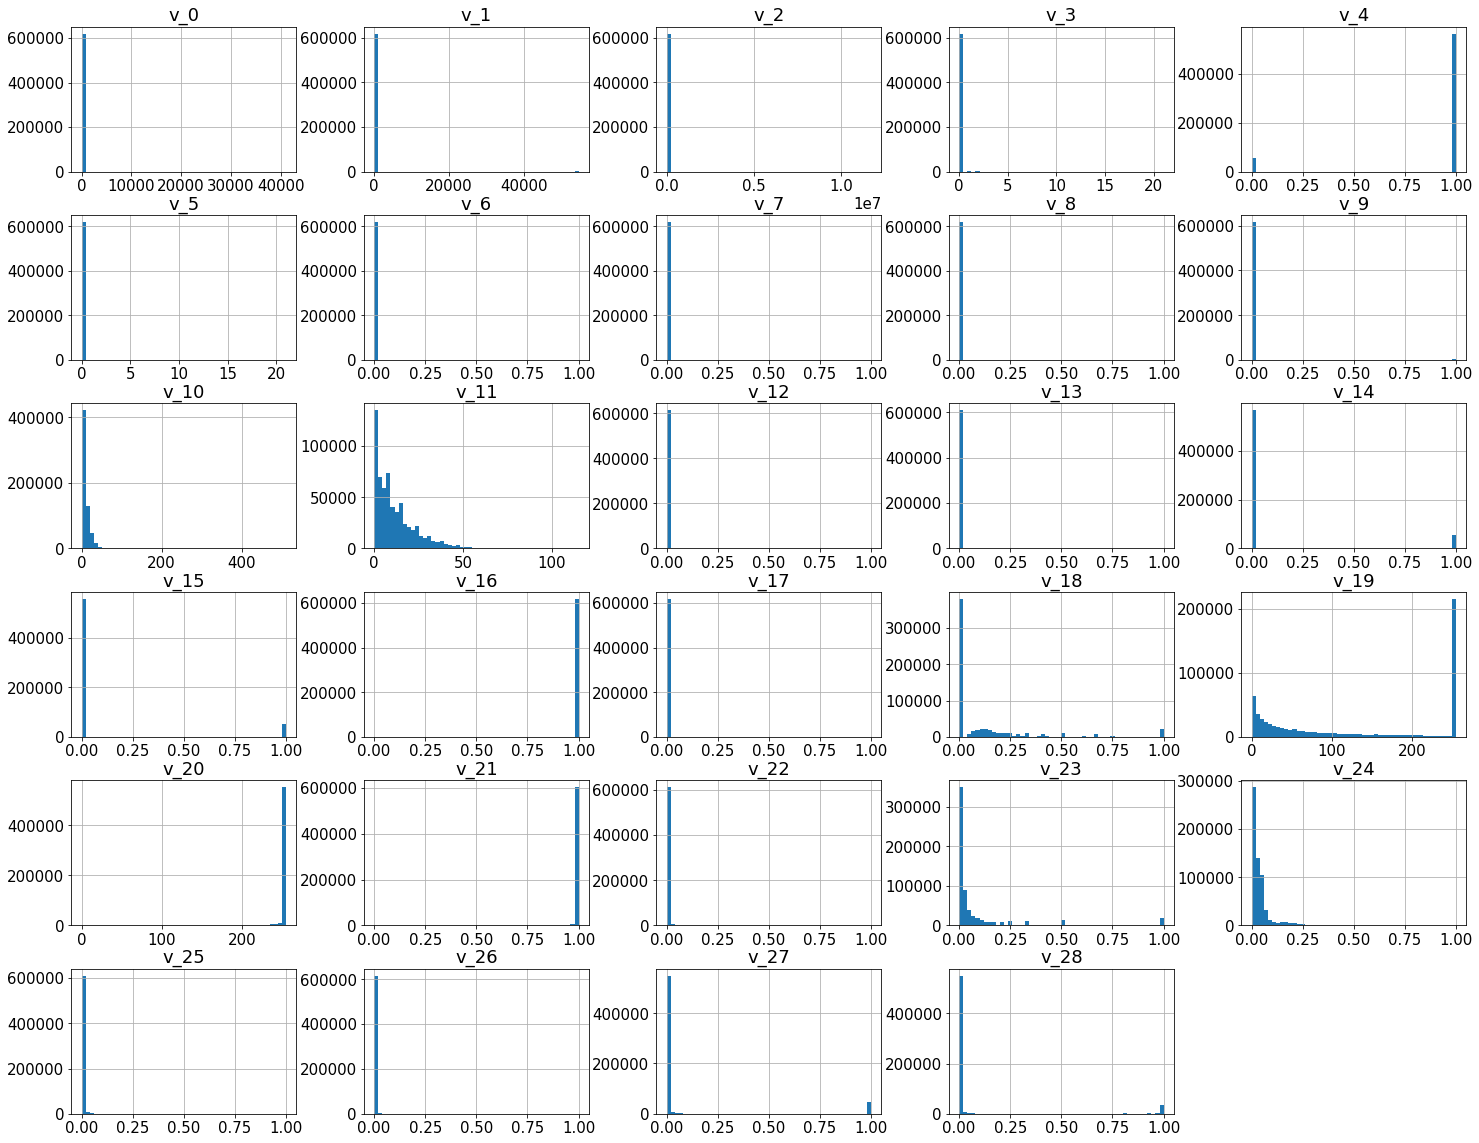

In [6]:
df.hist(bins = 50, figsize = (25,20))
plt.show()